<a href="https://colab.research.google.com/github/HYAD-Yassin/Password_Factory/blob/main/Analyse_%26_RNN_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Premiere Base de Données**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!ls drive/MyDrive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 acoustique_voy_orales_20loc_ESTER_NCCFr_contexte_freqLex_distCentroide.csv
 AllDataSet_Filtred.txt
 AllDataSet.txt
 archive.zip
 Ashley-Madison.txt
'Colab Notebooks'
 DATABASE_Password.zip
 data.zip
 Filtered-Ashley-Madison.txt
 Filtered_PWD.txt
 histo2.png
 histogram1.png
 Letter.gdoc
 my_model
 nameGeneration.py
 Passwords.txt
 __pycache__
 rnn.pt
'Untitled document (1).gdoc'
'Untitled document.gdoc'


In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import re

# Remplacez le chemin par le chemin approprié de votre fichier dans Google Drive
file_path = '/content/drive/My Drive/Ashley-Madison.txt'

# Charger le fichier de corpus
with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

In [ ]:
# Prétraitement du texte
words = text.split()  # Ceci divise le texte en mots en fonction des espaces
import statistics


# Calcul des statistiques
lengths = [len(word) for word in words]
average_length = sum(lengths) / len(words) if words else 0
unique_words = set(words)
redundant_words_count = len(words) - len(unique_words)
length_distribution = Counter(lengths)
number_of_passwords = len(words)

# Filtrer les mots pour obtenir les types demandés
letters_only = sum(1 for word in unique_words if word.isalpha())
numbers_only = sum(1 for word in unique_words if word.isdigit())
special_chars_only = sum(1 for word in unique_words if re.match(r'^\W+$', word))
mixed_types = sum(1 for word in unique_words if any(c.isalpha() for c in word) and any(c.isdigit() for c in word) or any(not c.isalnum() for c in word))

# Affichage des résultats
print(f"Nombre total de mots de passe (lignes) dans le corpus: {number_of_passwords}")
print(f"Longueur moyenne des mots: {average_length:.2f}")
print(f"Nombre de mots redondants: {redundant_words_count}")
print(f"Nombre de mots avec uniquement des lettres: {letters_only}")
print(f"Nombre de mots avec uniquement des chiffres: {numbers_only}")
print(f"Nombre de mots avec uniquement des caractères spéciaux: {special_chars_only}")
print(f"Nombre de mots avec des combinaisons de lettres et d'autres caractères: {mixed_types}")


Nombre total de mots de passe (lignes) dans le corpus: 376170
Longueur moyenne des mots: 7.60
Nombre de mots redondants: 405
Nombre de mots avec uniquement des lettres: 131620
Nombre de mots avec uniquement des chiffres: 46314
Nombre de mots avec uniquement des caractères spéciaux: 15
Nombre de mots avec des combinaisons de lettres et d'autres caractères: 197831


In [ ]:
# Calcul de l'écart-type et la variance
standard_deviation = statistics.stdev(lengths)
variance = statistics.variance(lengths)

# Calcul de l'écart absolu moyen (MAD)
mean_length = statistics.mean(lengths)
mad = sum(abs(length - mean_length) for length in lengths) / len(lengths)

# Calcul du ratio de mots uniques
unique_word_ratio = len(unique_words) / len(words) if words else 0
# Affichage des statistiques supplémentaires
print(f"Écart-type de la longueur des mots: {standard_deviation:.2f}")
print(f"Variance de la longueur des mots: {variance:.2f}")
print(f"Écart absolu moyen (MAD) de la longueur des mots: {mad:.2f}")
print(f"Ratio de mots uniques par rapport au total des mots: {unique_word_ratio:.2f}")

Écart-type de la longueur des mots: 1.82
Variance de la longueur des mots: 3.31
Écart absolu moyen (MAD) de la longueur des mots: 1.43
Ratio de mots uniques par rapport au total des mots: 1.00


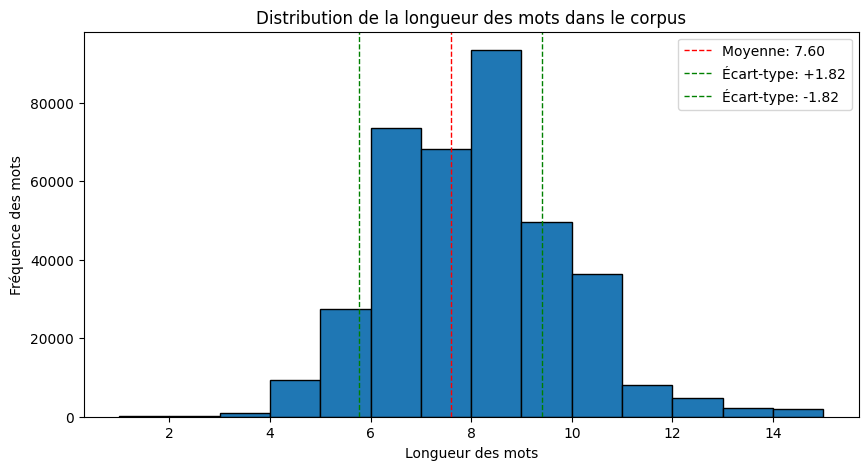

In [ ]:
import matplotlib.pyplot as plt
# Créer le graphique de la distribution de la longueur des mots
plt.figure(figsize=(10,5))  # Ajustez la taille au besoin
plt.hist(lengths, bins=range(1, 16), edgecolor='black')  # Ajustez l'intervalle de bins pour couvrir les longueurs de mots jusqu'à 15

# Annoter avec des statistiques
mean_val = statistics.mean(lengths)
std_dev_val = statistics.stdev(lengths)
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Moyenne: {mean_val:.2f}')
plt.axvline(mean_val + std_dev_val, color='green', linestyle='dashed', linewidth=1, label=f'Écart-type: +{std_dev_val:.2f}')
plt.axvline(mean_val - std_dev_val, color='green', linestyle='dashed', linewidth=1, label=f'Écart-type: -{std_dev_val:.2f}')

# Titre et étiquettes
plt.title('Distribution de la longueur des mots dans le corpus')
plt.xlabel('Longueur des mots')
plt.ylabel('Fréquence des mots')
plt.legend()

# Afficher le graphique
plt.show()

#**Preparing The ENV**

In [ ]:
import os

# Folder path that you want to create
folder_path = '/content/models'

# Check if the folder already exists
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"Folder created at {folder_path}")
else:
    print(f"Folder already exists at {folder_path}")

Folder already exists at /content/models


In [ ]:
import os

# Folder path that you want to create
folder_path = '/content/data'

# Check if the folder already exists
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"Folder created at {folder_path}")
else:
    print(f"Folder already exists at {folder_path}")

Folder already exists at /content/data


In [ ]:
!pip install torch torchvision
!pip install unidecode

In [ ]:
!ls '/content/data'

!ls '/content/models'

!cp '/content/drive/My Drive/rnn.pt' '/content/models'

!cp '/content/drive/My Drive/Ashley-Madison.txt' '/content/data'



Ashley-MadisonTest.txt	Ashley-MadisonTrain.txt  Ashley-Madison.txt
rnn.pt


#**RNN**

In [ ]:
from __future__ import unicode_literals, print_function, division

import unidecode
import string
import random
import re
import sys

from io import open
import glob
import os
import unicodedata
import string
import random

import time
import math

from os import listdir, path, makedirs, popen
from os.path import isdir, isfile, join, basename

import torch
import torch.nn as nn
from torch.autograd import Variable

import time, math

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from argparse import ArgumentParser

if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print('CUDA AVAILABLE')
else:
    device = torch.device("cpu")
    print('ONLY CPU AVAILABLE')

n_iters = 100000
all_losses = []
total_loss = 0  # Reset every plot_every iters

n_epochs = 200000
print_every = 1000
plot_every = 10
hidden_size = 512
n_layers = 2
lr = 0.005
bidirectional = True

all_letters = string.ascii_letters + string.digits + "!@#$%^&*()-_=+[]{};:'\",.<>/?\\|`~"
print('all_letters: ', all_letters)
n_letters = len(all_letters) + 1  # Plus EOS marker


def findFiles(path): return glob.glob(path)


# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )


# Read a file and split into lines
def readLines(filename):
    with open(filename, encoding='utf-8') as some_file:
        return [unicodeToAscii(line.strip().lower()) for line in some_file]

CUDA AVAILABLE
all_letters:  abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789!@#$%^&*()-_=+[]{};:'",.<>/?\|`~


In [ ]:
filename = 'data/Ashley-Madison.txt'
filenameTrain = 'data/Ashley-MadisonTrain.txt'
filenameTest = 'data/Ashley-MadisonTest.txt'


def getLines(f):
    lines = readLines(f)
    print('lines: ', len(lines), ' -> ', f)
    return lines


def split(rate, lines):
    names = []

    # for letter in string.ascii_uppercase:
    for letter in string.ascii_letters:
        names_letter = []
        for line in lines:
            #print(f"Processing line: '{line}'")  # Debug print
            if line[0] == letter:
                names_letter.append(line)
        if len(names_letter) > 0:
            names.append(names_letter)

    print('split names: ', len(names))
    names_traing = []
    names_testing = []
    for names_letter in names:
        length = len(names_letter)

        index = int(length * rate)

        training = names_letter[:index]
        testing = names_letter[index:]

        names_traing.append(training)
        names_testing.append(testing)

    f = open(filenameTrain, "w")
    for names_letter in names_traing:
        for names in names_letter:
            f.write(names + "\n")
    f.close()

    f = open(filenameTest, "w")
    for names_letter in names_testing:
        for names in names_letter:
            f.write(names + "\n")
    f.close()

    return names_traing, names_testing


**RNN Model**

In [ ]:
# Turn string into list of longs
def char_tensor(string):
    tensor = torch.zeros(len(string)).long()
    for c in range(len(string)):
        tensor[c] = all_characters.index(string[c])
    return Variable(tensor)


def random_training_set(file):
    chunk = random_chunk(file)
    inp = char_tensor(chunk[:-1]).to(device)
    target = char_tensor(chunk[1:]).to(device)
    return inp, target


# Random item from a list
def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]


# Get a random category and random line from that category
def randomTraining(lines):
    line = randomChoice(lines)
    return line


# One-hot matrix of first to last letters (not including EOS) for input
def inputTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)  # .long()
    for li in range(len(line)):
        letter = line[li]
        tensor[li][0][all_letters.find(letter)] = 1
    return tensor


# LongTensor of second letter to end (EOS) for target
def targetTensor(line):
    letter_indexes = [all_letters.find(line[li]) for li in range(1, len(line))]
    letter_indexes.append(n_letters - 1)  # EOS
    return torch.LongTensor(letter_indexes)


# Make category, input, and target tensors from a random category, line pair
def randomTrainingExample(lines):
    line = randomTraining(lines)
    input_line_tensor = inputTensor(line)
    target_line_tensor = targetTensor(line)
    return input_line_tensor, target_line_tensor


def train(input_line_tensor, target_line_tensor):
    target_line_tensor.unsqueeze_(-1)
    hidden = decoder.init_hidden()

    decoder.zero_grad()

    loss = 0

    for i in range(input_line_tensor.size(0)):
        output, hidden = decoder(input_line_tensor[i].to(device), hidden.to(device))
        l = criterion(output.to(device), target_line_tensor[i].to(device))
        loss += l

    loss.backward()

    # decoder_optimizer.step()
    for p in decoder.parameters():
        p.data.add_(p.grad.data, alpha=-lr)

    return output, loss.item() / input_line_tensor.size(0)


def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

class RNNLight(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNLight, self).__init__()

        self.input_size = input_size
        self.hidden_size = hidden_size
        self.n_layers = n_layers

        self.bidirectional = bidirectional
        self.num_directions = 1
        if self.bidirectional:
            self.num_directions = 2

        self.rnn = nn.RNN(input_size=self.input_size, hidden_size=self.hidden_size, num_layers=1,
                          bidirectional=self.bidirectional, batch_first=True)
        self.out = nn.Linear(self.num_directions * self.hidden_size, output_size)

        self.dropout = nn.Dropout(0.1)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        _, hidden = self.rnn(input.unsqueeze(0), hidden)

        hidden_concatenated = hidden

        if self.bidirectional:
            hidden_concatenated = torch.cat((hidden[0], hidden[1]), 1)
        else:
            hidden_concatenated = hidden.squeeze(0)

        output = self.out(hidden_concatenated)

        output = self.dropout(output)
        output = self.softmax(output)

        return output, hidden

    def init_hidden(self):
        return torch.zeros(self.num_directions, 1, self.hidden_size)

    # return Variable(torch.zeros(self.n_layers, 1, self.hidden_size, device=device))

    def init_hidden_random(self):
        return torch.rand(self.num_directions, 1, self.hidden_size)
    # return Variable(torch.zeros(self.n_layers, 1, self.hidden_size, device=device))


class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.input_size = input_size
        self.hidden_size = hidden_size
        self.n_layers = n_layers

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.o2o = nn.Linear(hidden_size + output_size, output_size)
        self.dropout = nn.Dropout(0.1)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        # print('---')
        # print('input: ', input.size())
        # print('hidden: ', hidden.size())
        input_combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(input_combined)
        output = self.i2o(input_combined)
        output_combined = torch.cat((hidden, output), 1)
        output = self.o2o(output_combined)
        output = self.dropout(output)
        output = self.softmax(output)

        # print('output: ', output.size())$
        # input:  torch.Size([1, 59])
        # hidden:  torch.Size([1, 128])
        # output:  torch.Size([1, 59])

        return output, hidden

    def init_hidden(self):
        return torch.zeros(1, self.hidden_size)

    def init_hidden_random(self):
        return torch.rand(1, self.hidden_size)
    # return Variable(torch.zeros(self.n_layers, 1, self.hidden_size, device=device))


def training(n_epochs, lines):
    print()
    print('-----------')
    print('|  TRAIN  |')
    print('-----------')
    print()

    start = time.time()
    all_losses = []
    total_loss = 0
    best_loss = 100
    print_every = n_epochs / 100

    for iter in range(1, n_epochs + 1):
        output, loss = train(*randomTrainingExample(lines))
        total_loss += loss

        if iter % print_every == 0:
            print('%s (%d %d%%) Loss: %.4f (%.4f)' % (timeSince(start), iter, iter / n_iters * 100, total_loss / iter, loss))


max_length = 20


def samples(start_letters='ABC'):
    for start_letter in start_letters:
        print(sample(start_letter))


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSinceStart(since):
    now = time.time()
    s = now - since
    return '%s' % (asMinutes(s))


def progressPercent(totalNames, start, names, p, samplesGenerated):
    bar_len = 50
    filled_len = int(round(bar_len * names / float(totalNames)))
    percents = round(100.0 * names / float(totalNames), 1)
    nNames = int(p / 100 * totalNames)

    if filled_len == 0:
        bar = '>' * filled_len + ' ' * (bar_len - filled_len)
    else:
        bar = '=' * (filled_len - 1) + '>' + ' ' * (bar_len - filled_len)

    sys.stdout.write(
        '[%s] %s%s names founded among %d samples generated (%d of %d names) on %s (goal = %.1f%% = %d names)\r' % (
        bar, percents, '%', samplesGenerated, names, totalNames, timeSinceStart(start), p, nNames))
    sys.stdout.flush()


def progress(total, acc, start, epoch, l):
    bar_len = 50
    filled_len = int(round(bar_len * epoch / float(total)))
    percents = round(100.0 * epoch / float(total), 1)

    if filled_len == 0:
        bar = '>' * filled_len + ' ' * (bar_len - filled_len)
    else:
        bar = '=' * (filled_len - 1) + '>' + ' ' * (bar_len - filled_len)

    sys.stdout.write('[%s] %s%s epoch: %d acc: %.3f %% and testing size = %d names => coverage of %.3f %% on %s \r' % (
    bar, percents, '%', epoch, (100 * acc / epoch), l, (100 * acc / l), timeSinceStart(start)))
    sys.stdout.flush()


def sample(decoder, start_letters='ABC'):
    with torch.no_grad():  # no need to track history in sampling

        hidden = decoder.init_hidden_random()

        if len(start_letters) > 1:
            for i in range(len(start_letters)):
                input = inputTensor(start_letters[i])
                # print(start_letters[i], ' ', hidden)
                output, hidden = decoder(input[0].to(device), hidden.to(device))

            topv, topi = output.topk(1)
            topi = topi[0][0]
            if topi == n_letters - 1:
                return start_letters

            letter = all_letters[topi]
            input = inputTensor(letter)
        else:
            input = inputTensor(start_letters)

        output_name = start_letters

        for i in range(max_length):
            output, hidden = decoder(input[0].to(device), hidden.to(device))
            topv, topi = output.topk(1)
            topi = topi[0][0]
            if topi == n_letters - 1:
                break
            else:
                letter = all_letters[topi]
                output_name += letter
            input = inputTensor(letter)

        return output_name



def testing(decoder, nb_samples, lineTest, percent, max_length):
    start = time.time()
    accuracy = 0
    predicted = "a"
    predicted_current = []

    with open('pswliste.txt', 'w') as file:
        if nb_samples > 0:
            for i in range(1, nb_samples + 1):
                nc = 1  # Or any other logic you have for choosing 'nc'

                while len(predicted) < 8 or predicted in predicted_current:
                    starting_letters = "".join(random.choice(string.ascii_uppercase) for _ in range(nc))
                    predicted = sample(decoder, starting_letters).lower()

                predicted_current.append(predicted)
                file.write(predicted + '\n')

                if predicted in lineTest:
                    accuracy += 1

            accuracy = 100 * accuracy / nb_samples
            print('Accuracy:', accuracy, '%')

        else:
            i = 0
            l = len(lineTest)
            p = int(percent / 100 * l)
            while accuracy < p:
                nc = random.randint(1, int(max_length / 2 - 1))

                while predicted in predicted_current:
                    starting_letters = "".join(random.choice(string.ascii_uppercase) for _ in range(nc))
                    predicted = sample(decoder, starting_letters).lower()

                predicted_current.append(predicted)
                file.write(predicted + '\n')

                if predicted in lineTest:
                    accuracy += 1

                i += 1

            print(f"{percent}% of all names ({l}) reached in {i} iterations ({timeSinceStart(start)} s)...")






def evaluating(decoder):
    print()
    print('------------')
    print('|   EVAL   |')
    print('------------')
    print()

    try:
        while True:
            print('Enter a starting two or tree charachters but less than ', (2 * max_length), ' charachters: ')
            starting_letters = input()
            print()
            if len(starting_letters) > 0 and len(starting_letters) < (2 * max_length):
                print('Generated up to ', max_length, 'charcaters: ')
                predicted = sample(decoder, starting_letters)
                print(predicted)
            else:
                print(starting_letters, ' length < 1 or > ', (2 * max_length))
            print('------------')
            print()

    except KeyboardInterrupt:
        print("Press Ctrl-C to terminate evaluating process")
        print('------------')


def getMeanSize(listData):
    mean = 0
    for word in listData:
        mean = mean + len(word)

    return int(mean / len(listData))

**Main**

In [ ]:
if __name__ == '__main__':

    class Args:
        trainingData = 'data/Ashley-Madison.txt'
        trainEval = 'test'
        run = "rnnGeneration"
        model = 'models/rnn.pt'
        n = 10000 # Test values
        ml = 10
        s = 0.7
        num_layers = 2
        hidden_size = 256
        bidirectional = True
        max_epochs = 100000
        percent = 15

    args = Args()

    repData = args.trainingData


    file = unidecode.unidecode(open(repData).read())
    file_len = len(file)
    bidirectional = args.bidirectional
    lines = getLines(filename)
    train_set, test_set = split(args.s, lines)

    print('filenameTrain: ', filenameTrain)
    lineTraining = getLines(filenameTrain)
    lineTest = getLines(filenameTest)


    print('lineTraining: ', len(lineTraining))
    print('lineTest: ', len(lineTest))

    if args.ml > 0:
        max_length = args.ml
    else:
        max_length = getMeanSize(lineTraining)

    decoder = RNN(n_letters, 128, n_letters).to(
        device)  # RNN(n_characters, args.hidden_size, n_characters, args.num_layers).to(device)
    decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr)

    print('decoder: ', decoder)

    decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    n_epochs = args.max_epochs

    modelFile = args.run + "_" + str(args.num_layers) + "_" + str(args.hidden_size) + ".pt"

    if not path.exists(args.model):
        makedirs(basename(args.model))

    #########
    # TRAIN #
    #########
    if args.trainEval == 'train':
        decoder.train()
        training(n_epochs, lineTraining)
        torch.save(decoder, args.model)
        print('Model saved in: ', args.model)
    #########
    # EVAL  #
    #########
    elif args.trainEval == 'eval':
        decoder.eval()
        decoder = torch.load(args.model)
        decoder.eval().to(device)
        evaluating(decoder)
    #########
    # TEST  #
    #########
    elif args.trainEval == 'test':
        decoder.eval()
        decoder = torch.load(args.model)
        decoder.eval().to(device)
        testing(decoder, args.n, lineTest, args.percent, max_length)  # Pass max_length here
    else:
        print('Choose trainEval option (--trainEval train/eval/test')

lines:  375853  ->  data/Ashley-Madison.txt
split names:  26
filenameTrain:  data/Ashley-MadisonTrain.txt
lines:  214220  ->  data/Ashley-MadisonTrain.txt
lines:  91826  ->  data/Ashley-MadisonTest.txt
lineTraining:  214220
lineTest:  91826
decoder:  RNN(
  (i2h): Linear(in_features=223, out_features=128, bias=True)
  (i2o): Linear(in_features=223, out_features=95, bias=True)
  (o2o): Linear(in_features=223, out_features=95, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (softmax): LogSoftmax(dim=1)
)


In [ ]:
model_save_path = '/content/drive/My Drive/rnn.pt'
torch.save(decoder.state_dict(), model_save_path)

In [ ]:
!ls
